In [1]:
%load_ext autoreload
%autoreload 2

import math
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
import numpy as np
import pandas as pd
import matplotlib.transforms as transforms


from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import datetime
import statsmodels

# Local Modules
import sys
import os.path
sys.path.insert(0, os.path.abspath('/scratch/horta/coronawiki/'))
from helpers.load import load_interventions, load_aggregated, load_topics
from helpers.vars import codes, helper_langs, interventions_helper, topics, codes
from helpers.plot import set_size, plot_dates, plot_interventions
from helpers.topics import order_topics, colors_z, get_df_pageviews_topics,get_diffs_in_diffs_result_topics
from helpers.diffs_n_diffs import get_standard_error_sum
from dateutil.relativedelta import relativedelta
from helpers.load import load_interventions, load_aggregated, load_topics, load_pca
from helpers.vars import codes, helper_langs, interventions_helper, int_c, int_ls
from helpers.plot import set_size, plot_dates, plot_intervention, plot_cumm_diff
from helpers.pca import get_attention_shift_ts


In [2]:
# Latex Configuration
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
# fontpath = os.path.expanduser('~/LinLibertine_DRah.ttf')
# prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 14,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    #     'font.family': 'Linux Libertine Display',
    'text.usetex': True
}

mpl.rcParams.update(params)

In [3]:
interventions = load_interventions("../data/interventions.csv")
topics_df, topics = load_topics('../data/topics_linked.csv.xz')
agg = load_aggregated("../data/aggregated_timeseries.json.gz")
codes_order = ["sr", "it", "fr", "en", "nl", "ko", "de", "fi", "ja", "no", "sv", "da"]
time_int = 35

In [4]:
dfs_pca_shift = load_pca(codes_order, pca_folder="../data/pca/")

In [5]:
topics

['Culture.Biography.Biography*',
 'Culture.Biography.Women',
 'Culture.Food and drink',
 'Culture.Internet culture',
 'Culture.Linguistics',
 'Culture.Literature',
 'Culture.Media.Books',
 'Culture.Media.Entertainment',
 'Culture.Media.Films',
 'Culture.Media.Media*',
 'Culture.Media.Music',
 'Culture.Media.Radio',
 'Culture.Media.Software',
 'Culture.Media.Television',
 'Culture.Media.Video games',
 'Culture.Performing arts',
 'Culture.Philosophy and religion',
 'Culture.Sports',
 'Culture.Visual arts.Architecture',
 'Culture.Visual arts.Comics and Anime',
 'Culture.Visual arts.Fashion',
 'Culture.Visual arts.Visual arts*',
 'Geography.Geographical',
 'Geography.Regions.Africa.Africa*',
 'Geography.Regions.Africa.Central Africa',
 'Geography.Regions.Africa.Eastern Africa',
 'Geography.Regions.Africa.Northern Africa',
 'Geography.Regions.Africa.Southern Africa',
 'Geography.Regions.Africa.Western Africa',
 'Geography.Regions.Americas.Central America',
 'Geography.Regions.Americas.North

In [6]:
agg['fr']['topics']['STEM.Medicine & Health']['sum']['2018-01-01']

186339

In [6]:
topics_df['Mental.Health']=False
topics_df

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,STEM.STEM*,Culture.Performing arts,Culture.Literature,History and Society.Politics and government,Geography.Regions.Africa.Northern Africa,STEM.Earth and environment,Geography.Regions.Africa.Central Africa,STEM.Medicine & Health,STEM.Libraries & Information,Geography.Regions.Europe.Europe*,Geography.Regions.Europe.Western Europe,Culture.Media.Radio,STEM.Space,Culture.Visual arts.Comics and Anime,STEM.Technology,Culture.Internet culture,Culture.Media.Software,Geography.Regions.Asia.East Asia,Geography.Regions.Europe.Southern Europe,STEM.Biology,Culture.Food and drink,History and Society.Business and economics,Culture.Visual arts.Fashion,Geography.Regions.Americas.Central America,Geography.Geographical,Geography.Regions.Oceania,STEM.Physics,Culture.Media.Films,Geography.Regions.Asia.South Asia,History and Society.Transportation,History and Society.History,Geography.Regions.Africa.Western Africa,Culture.Media.Media*,Geography.Regions.Americas.South America,Culture.Linguistics,STEM.Computing,Culture.Biography.Biography*,Culture.Philosophy and religion,Culture.Sports,Geography.Regions.Africa.Southern Africa,Culture.Visual arts.Visual arts*,Geography.Regions.Africa.Eastern Africa,History and Society.Society,STEM.Engineering,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid,Mental.Health
0,Rosmalen,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q2001490,False
1,Commelinales,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q290349,False
2,Transport_in_Honduras,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q1130638,False
3,QuakeC,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q2122062,False
4,Food_writing,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q5465542,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [7]:
culture_topics={
'Culture.Media.Video games',
'Culture.Media.Books',
'Culture.Internet culture',
'Culture.Visual arts.Fashion',
'Culture.Media.Entertainment',
'Culture.Media.Films',
'Culture.Media.Television',
'Culture.Literature',
'Culture.Media.Radio',
'Culture.Visual arts.Comics and Anime',
'Culture.Media.Software',
'Culture.Food and drink',
'Culture.Media.Media*',
'Culture.Philosophy and religion',
'Culture.Sports',
'Culture.Media.Music'
}

In [216]:
mental = topics_df[topics_df['STEM.Medicine & Health']==True]
contain_values = mental[mental['index'].str.contains('suicide')]
contain_values

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,STEM.STEM*,Culture.Performing arts,Culture.Literature,History and Society.Politics and government,Geography.Regions.Africa.Northern Africa,STEM.Earth and environment,Geography.Regions.Africa.Central Africa,STEM.Medicine & Health,STEM.Libraries & Information,Geography.Regions.Europe.Europe*,Geography.Regions.Europe.Western Europe,Culture.Media.Radio,STEM.Space,Culture.Visual arts.Comics and Anime,STEM.Technology,Culture.Internet culture,Culture.Media.Software,Geography.Regions.Asia.East Asia,Geography.Regions.Europe.Southern Europe,STEM.Biology,Culture.Food and drink,History and Society.Business and economics,Culture.Visual arts.Fashion,Geography.Regions.Americas.Central America,Geography.Geographical,Geography.Regions.Oceania,STEM.Physics,Culture.Media.Films,Geography.Regions.Asia.South Asia,History and Society.Transportation,History and Society.History,Geography.Regions.Africa.Western Africa,Culture.Media.Media*,Geography.Regions.Americas.South America,Culture.Linguistics,STEM.Computing,Culture.Biography.Biography*,Culture.Philosophy and religion,Culture.Sports,Geography.Regions.Africa.Southern Africa,Culture.Visual arts.Visual arts*,Geography.Regions.Africa.Eastern Africa,History and Society.Society,STEM.Engineering,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid,Mental.Health
288995,Youth_suicide,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q8059353,False
340444,Interpersonal_theory_of_suicide,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q18208182,False
358042,Bullying_and_suicide,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,Q4997105,False
399716,Gender_differences_in_suicide,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,Q5530963,False
470417,United_States_military_veteran_suicide,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [217]:
#inspired by :World Health Organization. (1994). Lexicon of psychiatric and mental health terms. 2nd ed. https://apps.who.int/iris/handle/10665/39342
mental_health_dict = [
    'abuse',
    'addiction',
    'adjustment',
    'affect',
    'alcohol',
    'amnesia',
    'anorexia',
    'antidepressant',
    'anxiety',
    'attachment',
    'attention',
    'burnout',
    'compulsive',
    'consciousness',
    '_coping',
    'crisis',
    'dependence',
    'depression',
    'depressive',
    'deprivation',
    'deviance',
    'discrimination',
    'disorder'
    'fatigue',
    'grief',
    '_mental',
    'neglect',
    'parasocial',
    'phobia',
    'shock',
    'sleep',
    'social',
    'stress',
    'suicide',
    'traumatic'
]

In [226]:
mental = topics_df[topics_df['STEM.Medicine & Health']==True]
for m in mental_health_dict :
    mental_df = mental[mental['index'].str.contains(m)]
    topics_df.iloc[mental_df.index,-1]=True

In [227]:
topics_df[topics_df['Mental.Health']==True]

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,STEM.STEM*,Culture.Performing arts,Culture.Literature,History and Society.Politics and government,Geography.Regions.Africa.Northern Africa,STEM.Earth and environment,Geography.Regions.Africa.Central Africa,STEM.Medicine & Health,STEM.Libraries & Information,Geography.Regions.Europe.Europe*,Geography.Regions.Europe.Western Europe,Culture.Media.Radio,STEM.Space,Culture.Visual arts.Comics and Anime,STEM.Technology,Culture.Internet culture,Culture.Media.Software,Geography.Regions.Asia.East Asia,Geography.Regions.Europe.Southern Europe,STEM.Biology,Culture.Food and drink,History and Society.Business and economics,Culture.Visual arts.Fashion,Geography.Regions.Americas.Central America,Geography.Geographical,Geography.Regions.Oceania,STEM.Physics,Culture.Media.Films,Geography.Regions.Asia.South Asia,History and Society.Transportation,History and Society.History,Geography.Regions.Africa.Western Africa,Culture.Media.Media*,Geography.Regions.Americas.South America,Culture.Linguistics,STEM.Computing,Culture.Biography.Biography*,Culture.Philosophy and religion,Culture.Sports,Geography.Regions.Africa.Southern Africa,Culture.Visual arts.Visual arts*,Geography.Regions.Africa.Eastern Africa,History and Society.Society,STEM.Engineering,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid,Mental.Health
7625,Distress_(medicine),False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q5283089,True
29745,Social_anxiety,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q3557657,True
31335,Divided_consciousness,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Q5284031,True
54738,Institutional_abuse,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,Q16000123,True
67671,Central_nervous_system_depression,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Q5062120,True
69886,Chronic_

## Video/Games

In [7]:
number_vg = agg['fr']['topics']['Culture.Media.Video games']['len']
sum_vg = agg['fr']['topics']['Culture.Media.Video games']['sum']
percent_vg = agg['fr']['topics']['Culture.Media.Video games']['percent']

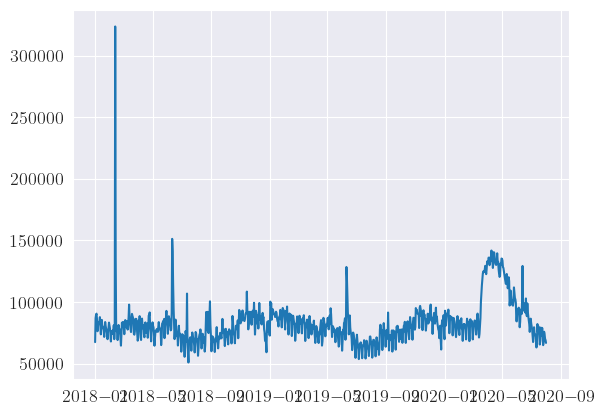

In [8]:
plt.plot(sum_vg)

In [9]:
agg['it']["sum"].index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', length=943, freq=None)

In [10]:
from helpers.vars import codes, helper_langs, interventions_helper, int_c, int_ls
from helpers.plot import set_size, plot_dates, plot_intervention, plot_cumm_diff
from helpers.pca import get_attention_shift_ts

136.1890425499862
0.01945678600316593
60.80184796495083
-7.894862547890825
49.54210139991962
-1.4401278590242963
46.98163023521538
-2.312153732317933
51.39047588374955
-1.7703282711053323
38.87420521753462
-1.3778555511322512
39.22795510864916
-3.308358049087432
10.368721390068144
-9.556351779827425
26.442053921578676
-10.506345453251257
10.649013938569725
-5.357599168028525
5.096779753608904
-9.075180835992121
0.1833501902097288
-13.877606413605273


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Shady\\AppData\\Local\\Temp\\tmp_3oq2hyf.png'

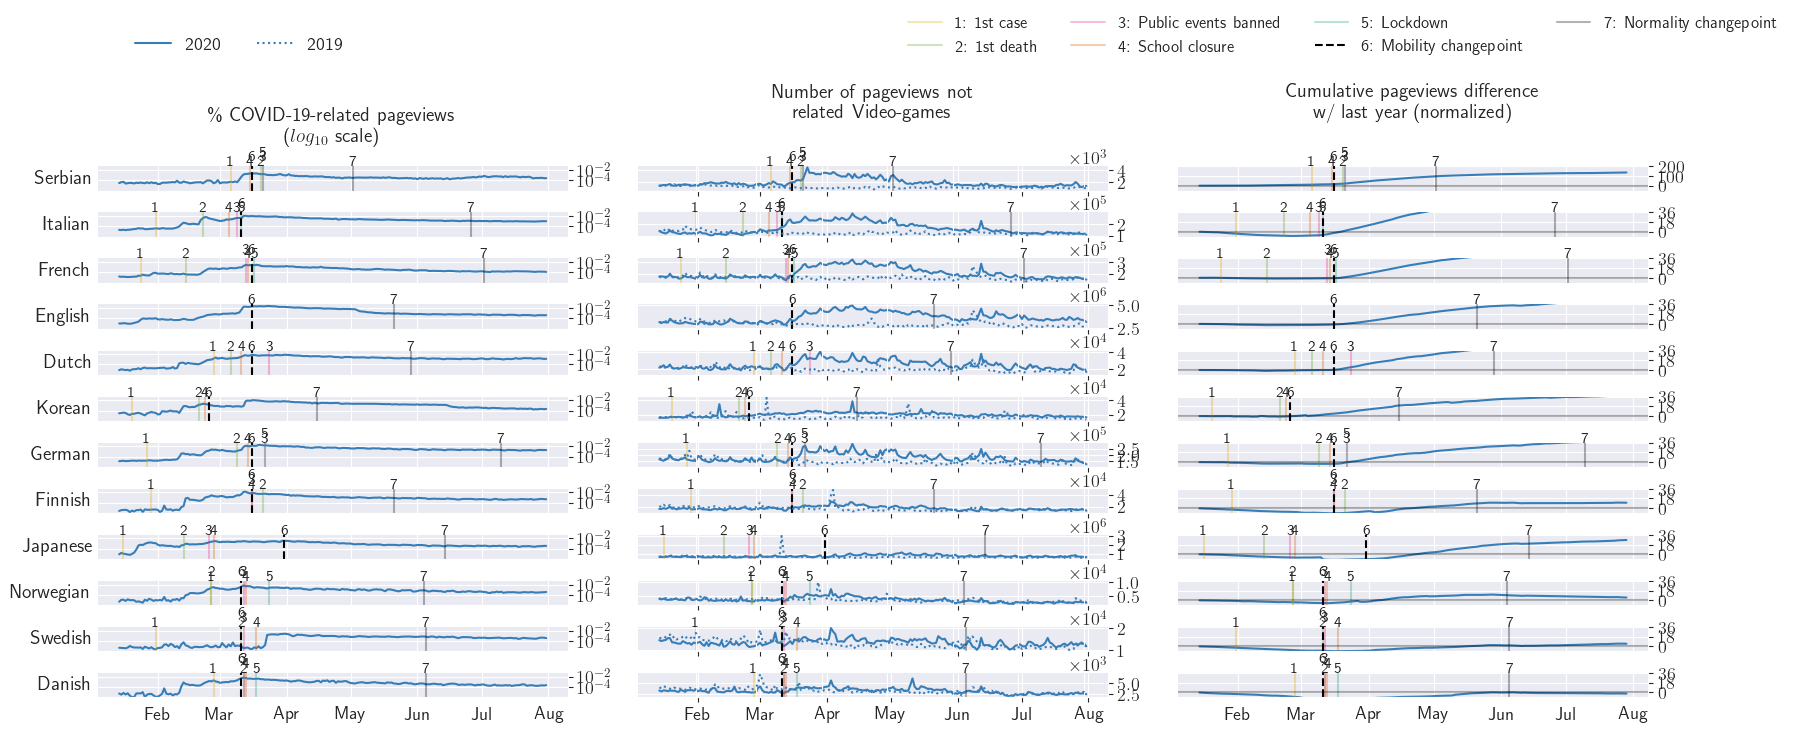

In [22]:
fig, axs = plt.subplots(12, 3,
                        figsize=(14, 10),
                        sharex=False,
                        gridspec_kw={"hspace": 0.9, "wspace": 0.15, "top": 0.7})

for idx, ax_ in enumerate(axs[:, :]):

    # COVID-RELATED PAGEVIEWS

    ax = ax_[0]

    code = codes_order[idx]
    ax.set_ylabel(helper_langs[code], rotation=0, ha="right", va="center", fontsize=14)
    start, end = plot_dates(ax, 20200114, 20200731,
                            agg[code]["sum"].index,
                            (agg[code]["covid"]["sum"].values + agg[code + ".m"]["covid"]["sum"].values +1)
                            / (agg[code]["sum"].values + agg[code+".m"]["sum"].values),  sci=False, color="#377eb8")

    plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('right')
    ax.set_yscale("log")
    ax.set_ylim([10**(-6), 5* 10**(-2)])
    ax.set_yticks([10**(-4), 10**(-2)])

    # VIDEO-GAME-RELATED PAGEVIEWS

    ax = ax_[1]

    ax_twin = ax.twiny()

    start, end = plot_dates(ax, 20200114, 20200731,
                            agg[code]["sum"].index, agg[code]['topics']['Culture.Media.Video games']["sum"].values + agg[code + ".m"]['topics']['Culture.Media.Video games']["sum"].values,
                            color="#377eb8", sci=False)

    plot_dates(ax_twin, 20190114, 20190731, agg[code]["sum"].index,
               agg[code]['topics']['Culture.Media.Video games']["sum"].values + agg[code + ".m"]['topics']['Culture.Media.Video games']["sum"].values,
               adjust=(start, end), sci=False, xticklabels=False, ls=":", color="#377eb8")


    plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

    for ax_t in [ax, ax_twin]:
        ax_t.spines['left'].set_visible(False)
        ax_t.spines['top'].set_visible(False)
        ax_t.yaxis.set_ticks_position('right')

    # CUMULATIVE PAGE VIEWS DIFFERENCE

    ax = ax_[2]

    plot_cumm_diff(ax, (20190101, 20191231), [20190115, 20200114], [20190731, 20200729],
                   agg[code]["sum"].index,
                   agg[code]['topics']['Culture.Media.Video games']["sum"].values + agg[code + ".m"]['topics']['Culture.Media.Video games']["sum"].values
                   )

    plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)

    ax.set_ylim([-7.5, 15])
    ax.axhline(0, color="black", alpha=0.3)

    for ax_t in [ax]:
        ax_t.spines['left'].set_visible(False)
        ax_t.spines['top'].set_visible(False)
        ax_t.yaxis.set_ticks_position('right')

    if idx == 0:
        ax.set_ylim(-50,200)
        ax.set_yticks([0, 100, 200])

    else:
        ax.set_ylim(-9,36)
        ax.set_yticks([0, 18, 36])

    for ax in ax_:
        if idx != 11:
            ax.set_xticklabels([])

axs[0,0].set_title("\% COVID-19-related pageviews \n ($log_{10}$ scale)", pad=35, y=0)
axs[0,1].set_title("Number of pageviews not\n related Video-games ", pad=35)
axs[0,2].set_title("Cumulative pageviews difference \n w/ last year (normalized)", pad=35)


lines = [
    Line2D([0], [0], color="#377eb8", lw=1.5, ls="-"),
    Line2D([0], [0], color="#377eb8", lw=1.5, ls=":"),
    Line2D([0], [0], color="black", lw=1.5, ls=":")
]

axs[0,0].legend(
    handles=lines,
    labels=["2020", "2019"],
    loc='lower center', bbox_to_anchor=(0.3, 5),
    ncol=3, fancybox=False, shadow=False,
    frameon=False, edgecolor=None, fontsize=13
)


lines_interv = [Line2D([0], [0], color=int_c[x], ls=int_ls[x], alpha=0.3 if x != "Mobility" else 1.)
                for x, _ in interventions_helper.items()]

axs[0,1].legend(
    handles= lines_interv,
    labels=["{}: {}".format(v,
                            k.replace("Mobility", "Mobility changepoint")\
                            .replace("Normalcy", "Normality changepoint"))
            for k, v in interventions_helper.items()],
    loc='lower center', bbox_to_anchor=(1.5, 5),
    ncol=4, fancybox=False, shadow=False,
    frameon=False, edgecolor=None, fontsize=12
)

set_size(fig, (20, 9))
#fig.savefig("../images/pageviews_videog.pdf", bbox_inches="tight")